Trying yolo3 tiny for improved inference time

MAP ~0.85 which is not high enough to put into production, can try re-running with larger image size as results on the truncated full darknet (m2.3.1) were promising

In [1]:
cd ..

/home/ubuntu/mini-metro


In [2]:
from plugins.SerpentMiniMetroGamePlugin.files.api.object_detector.pytorch_detector import PytorchObjectDetector
import skimage.io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
model_path = 'ml_train/station_detector/pytorch/models/m3/checkpoints/yolov3_ckpt_70.pth'
config_path = 'ml_train/station_detector/pytorch/models/m3/yolov3-custom.cfg'
labels_path = None
img_size = 416
conf_threshold = 0.5
nms_threshold = 0.1

In [4]:
station_detector = PytorchObjectDetector(model_path, config_path, labels_path, img_size)

### Running inference and plotting results on 'test' images

In [5]:
img_paths = list(Path("ml_train/station_detector/pytorch/data/test").glob("*.png"))
img_filenames = [img_path.name for img_path in img_paths]

In [6]:
%%time
images = [skimage.io.imread(img_path) for img_path in img_paths]

detection_results = [station_detector.predict(image, conf_threshold, nms_threshold) for image in images] 

CPU times: user 7.19 s, sys: 192 ms, total: 7.39 s
Wall time: 11.1 s


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


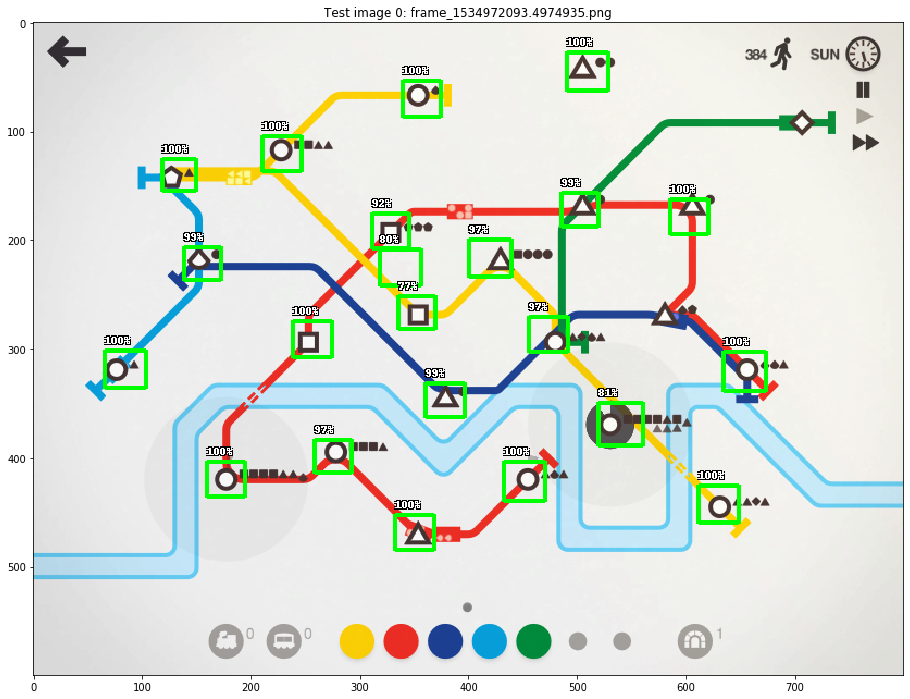

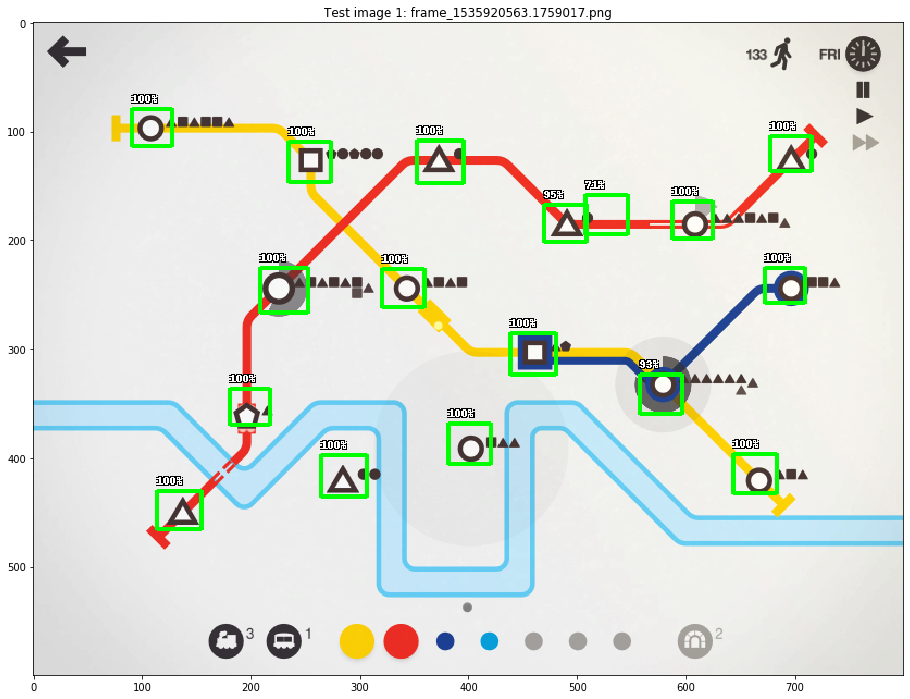

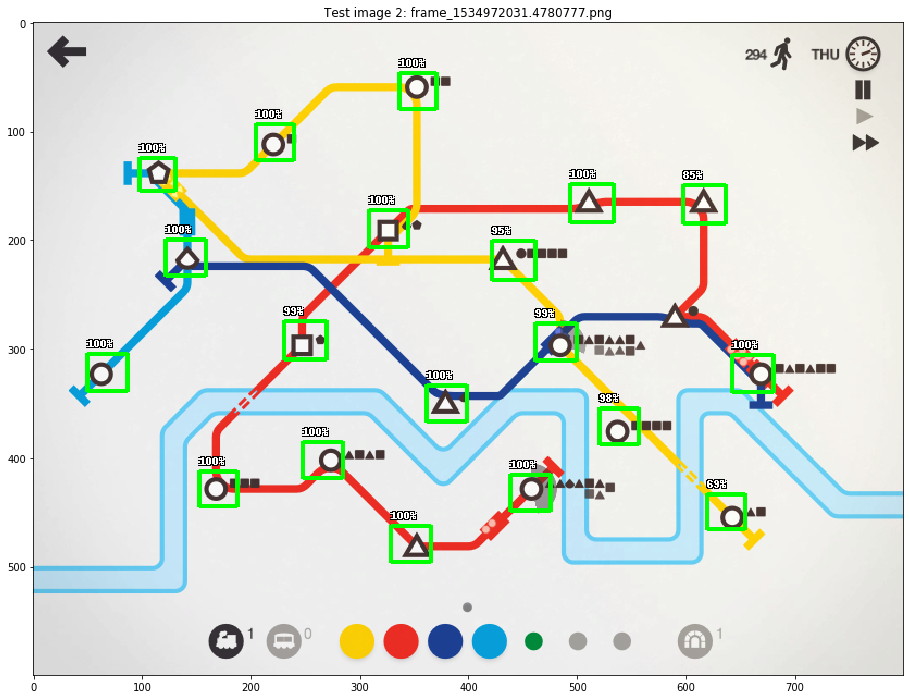

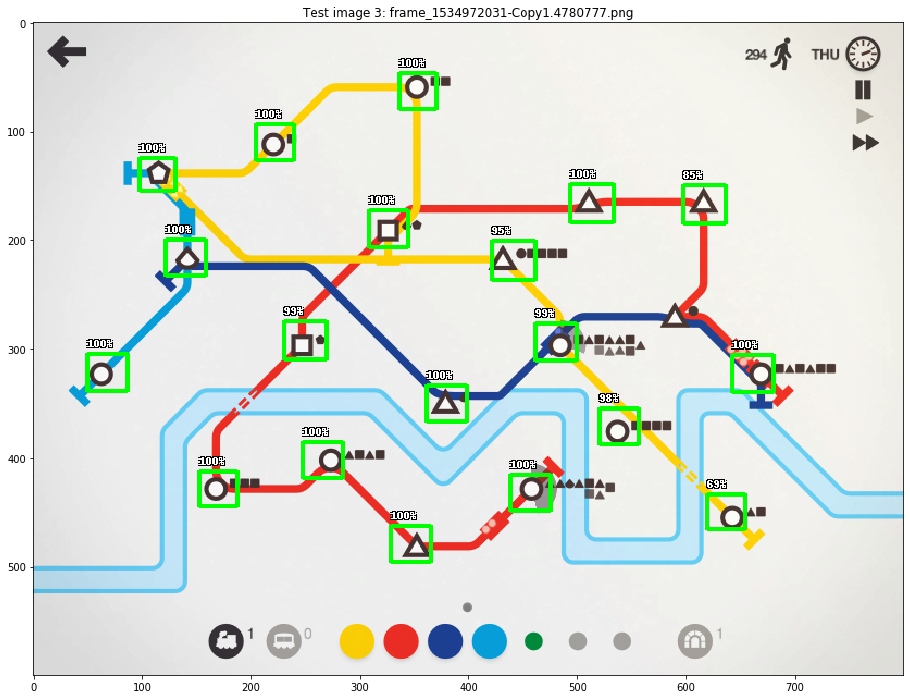

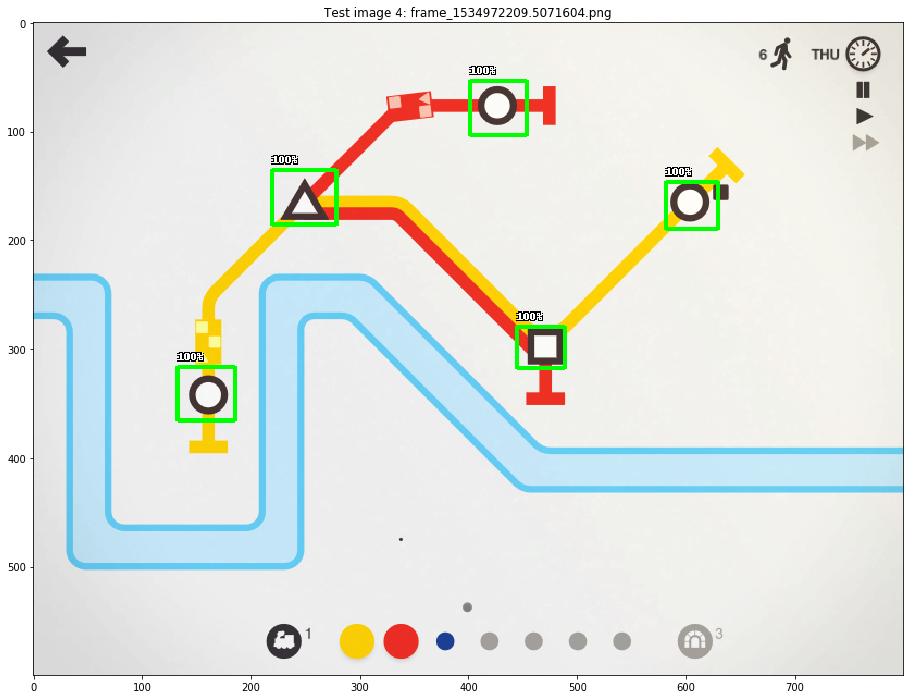

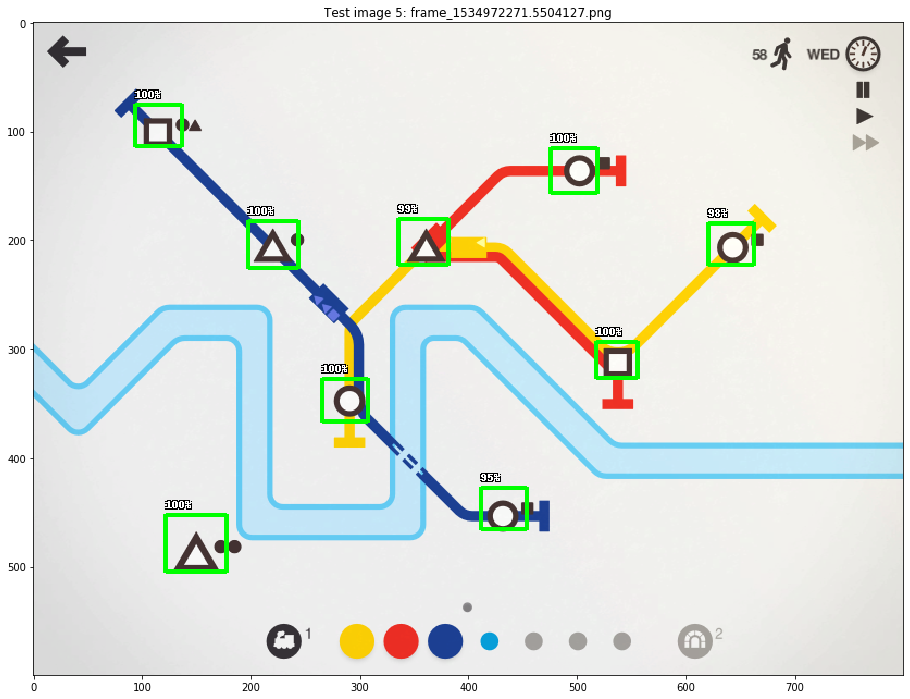

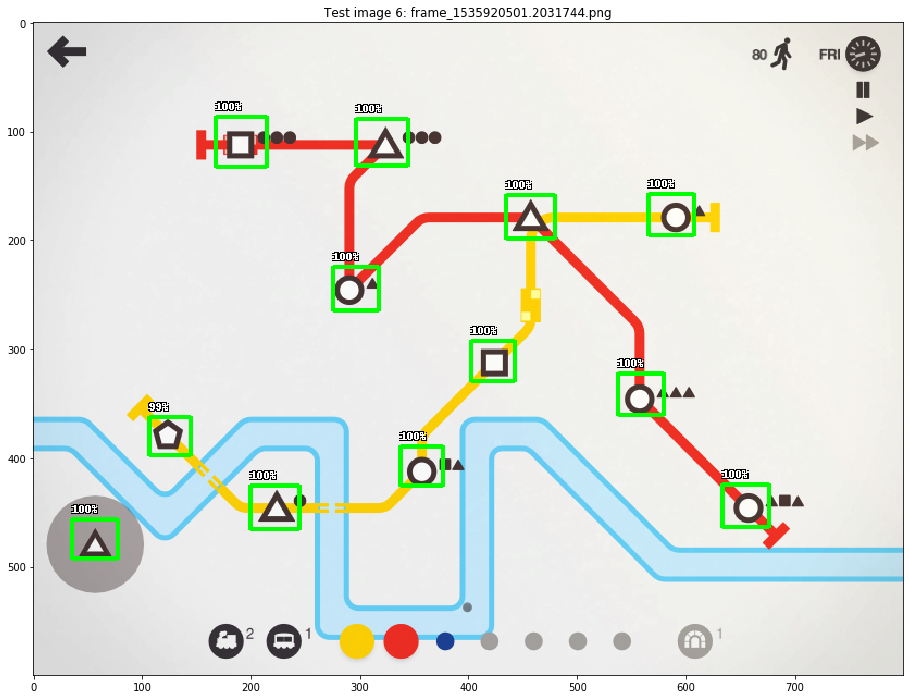

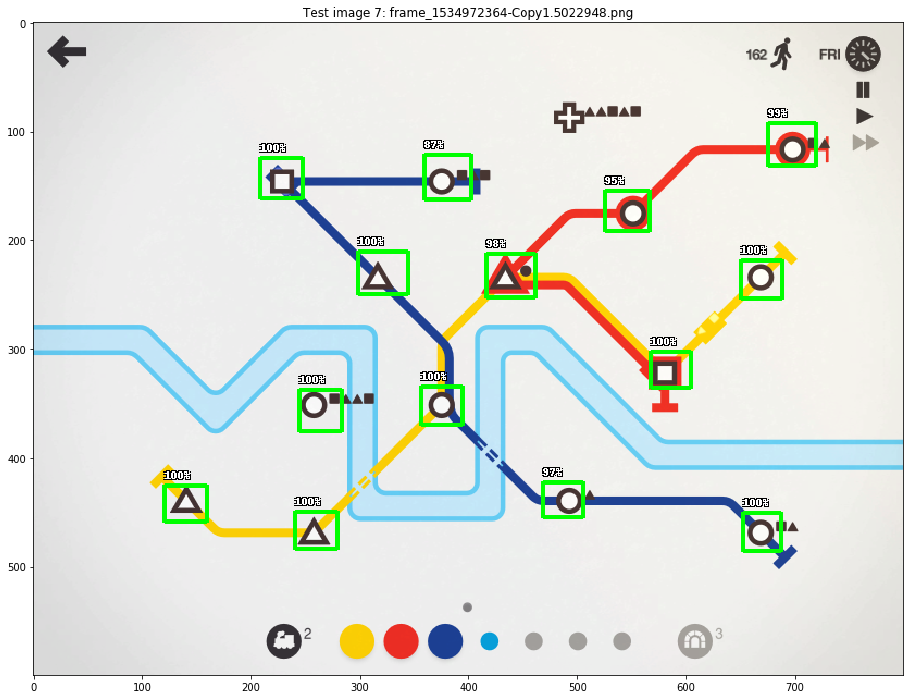

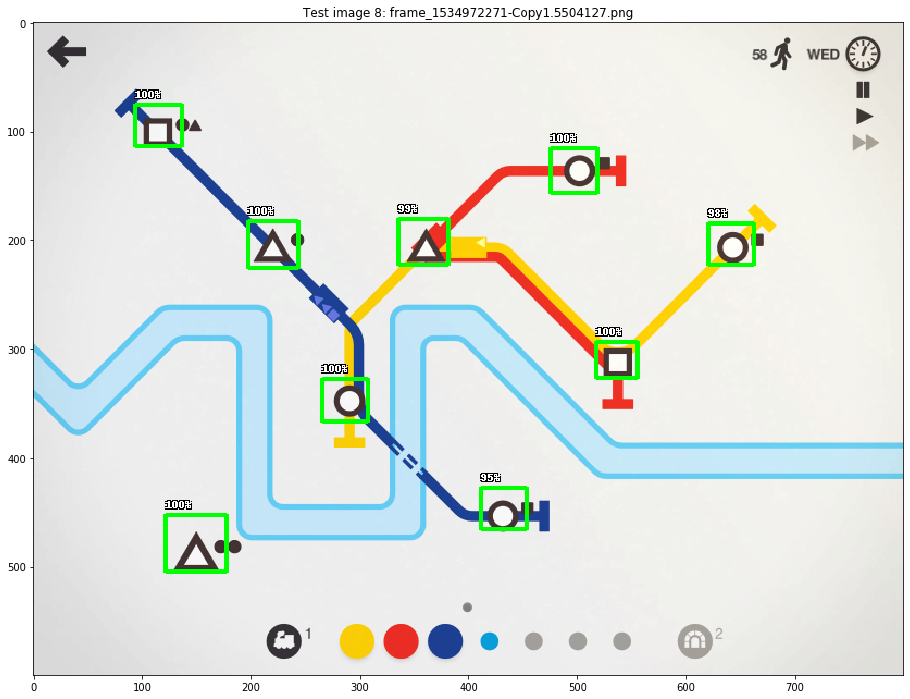

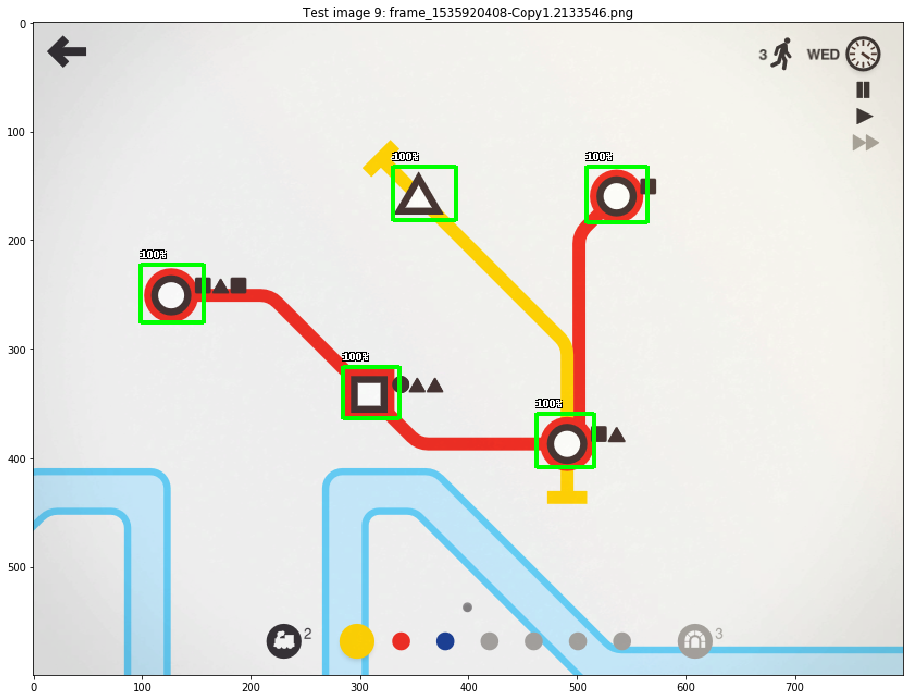

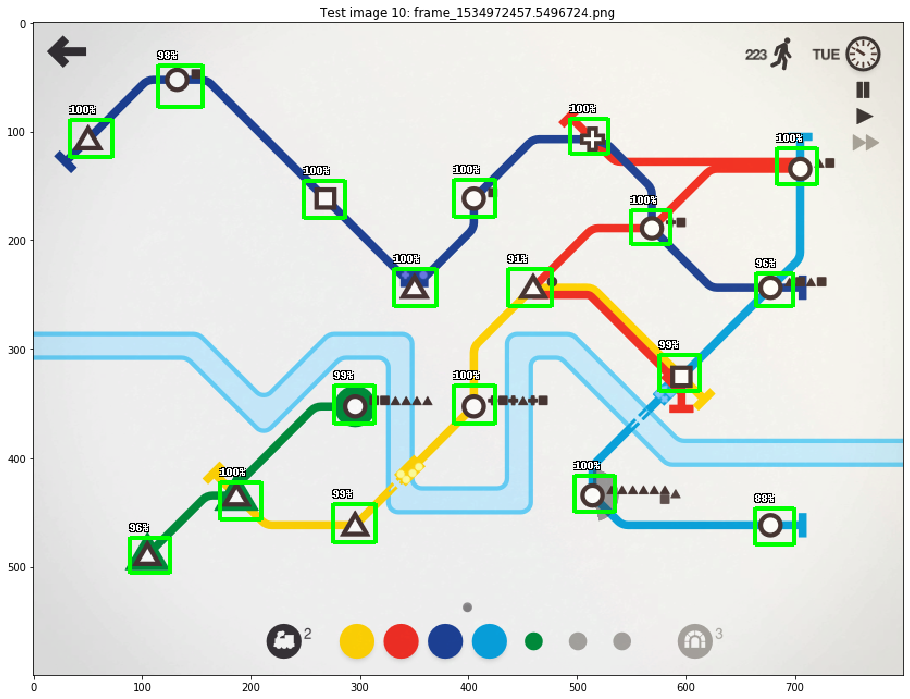

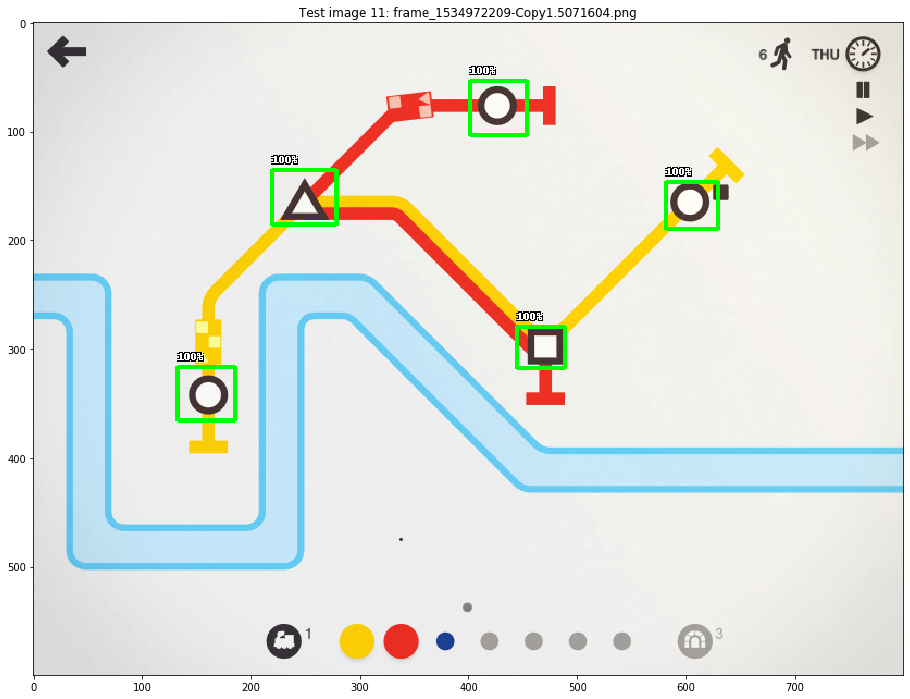

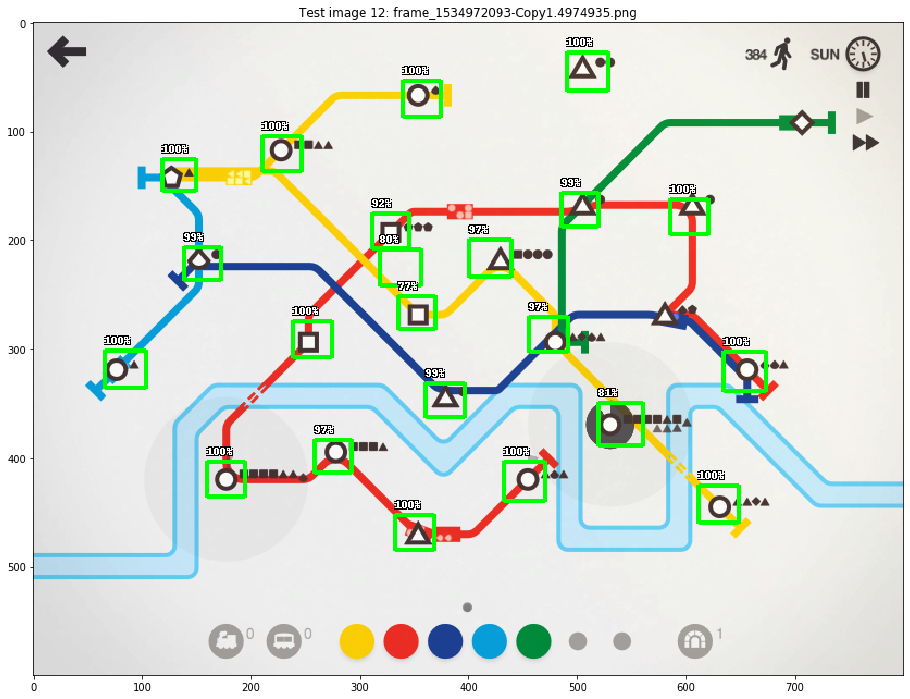

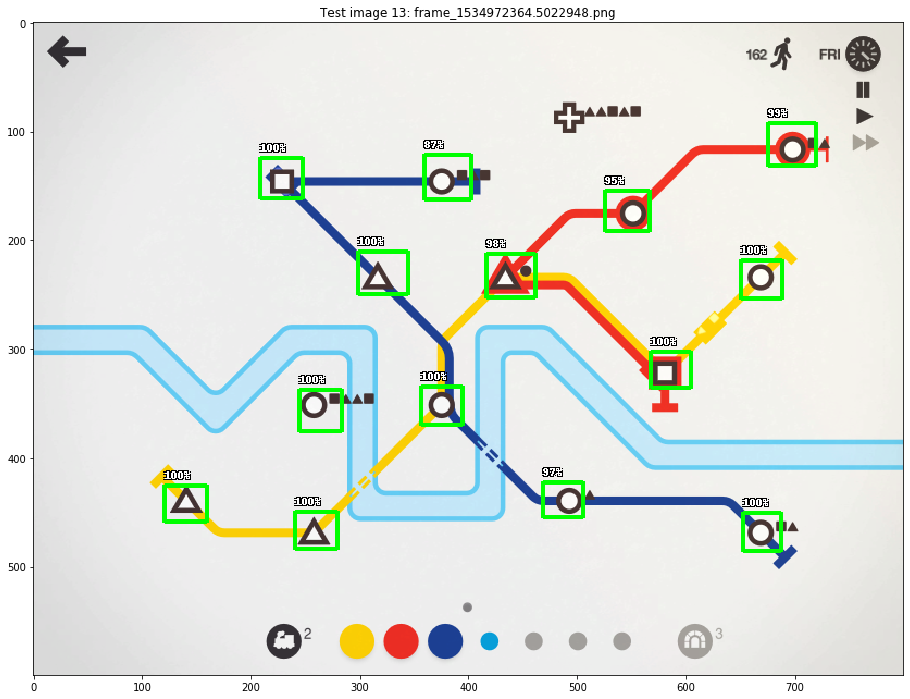

In [ ]:
for i, (image, img_filename, detection_result) in enumerate(zip(images, img_filenames, detection_results)):
    _, ax = plt.subplots(figsize=(22,12))
    image_box = station_detector.draw_bounding_boxes(image, **detection_result) 
    ax.set_title(f"Test image {i}: {img_filename}")
    ax.imshow(image_box);